In [1]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn(verbose=False)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
import ourfunctions

In [2]:
X = pd.read_csv('data/Training-set-values.csv')
y = pd.read_csv('data/Training-set-labels.csv')

X['date_recorded'] = pd.to_datetime(X['date_recorded']).astype(np.int64)

### Models

In [3]:
knn = {'classifier': KNeighborsClassifier(n_jobs=3), 'preprocessor': None}
log_reg_basic = {'classifier': LogisticRegression(C=1e6, n_jobs=3), 'preprocessor': None}

models = {'log_reg_basic': log_reg_basic, 'knn': knn}

### Modeler

In [4]:
model_run = ourfunctions.Modeler(models, X=X, y=y)
log_reg_regularized = {'classifier': LogisticRegression(n_jobs=3), 'preprocessor': model_run.create_default_prep(num_add=[('scaling', StandardScaler())])}
model_run.add_model('log_reg_regularized', log_reg_regularized)

In [5]:
RandomFM_all_cols = {'classifier': RandomForestClassifier(max_depth=20, min_samples_split=4, n_jobs=3), 'preprocessor': None}
model_run.add_model('RandomFM-all', RandomFM_all_cols)

In [6]:
model_run.model_evaluation('knn')

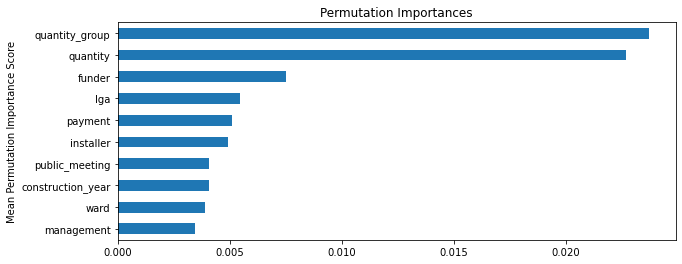

In [ ]:
importance_kwargs = dict(n_repeats=10, n_jobs=3)
model_run.permutation_importance('knn', perm_kwargs=importance_kwargs)